# Unsupervised Learning

The target data is not labeled in unsupervised learning but in supervised learning, the target data is labeled.                 
Both regression and classification comes under supervised learning.                                      
The popular unsupervised learning are clustering which consist of k-means clustering and hierarchial clustering.                
In clustering, the clusters are created based on similarity or dissimilarity of data.

## k-means clustering
In k-means clustering, the k is number of cluster.                                                    
The k-means begins by initializing k-centroids.                                             
Assignment - Each data point is assigned to the nearest centroid based on a distance metric called as euclidean distance, this step partitions the data into k-clusters.                                          
After all the data points have been assigned to the clusters, the centroids are updated by calculating the mean of all the datapoints within each cluster.                                       
The new centroids represent the center of their respective clusters.                                             
The above process is repeated until the convergence criteria is met where the convergence occur when the centroids no longer change significantly between the iterations or when a maximum number of iteration is reached.                           
The objective of k-means is to minimize the within cluster sum of squares(wcss) also known as inertia.                         
Eg -                                                             
4 datapoints                                
i  x1  x2                                                                 
A  2   3                                            
B  6   1                                                          
C  1   2                                                                                  
D  3   0                                                                            
Two Clusters ->                                    
C₁ = AB = (4,2)                                      
C₂ = CD = (2,1)                                                        
                                                                               
√(xᵢ - C)² + (yᵢ - y)²                            

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("University_Clustering.xlsx")
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [3]:
df.drop("State", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
new_df=df.drop("Univ", axis=1)
new_df.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
for col in new_df:
    ss=StandardScaler()
    new_df[col]=ss.fit_transform(new_df[[col]])

In [8]:
new_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [9]:
wcss=[]
clusters=list(range(1,9))
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(new_df)
    wcss.append(model.inertia_)

In [10]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.907807926289365,
 22.226523197843555,
 18.777141507084394,
 15.82546939804959]

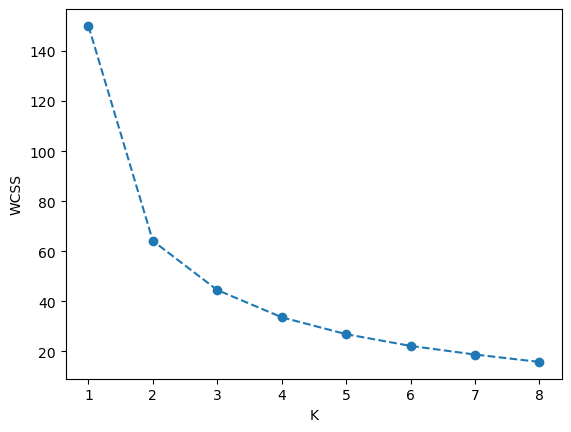

In [11]:
plt.figure()
plt.plot(clusters,wcss,"o--")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

Elbow Method is a graphical representation of finding the optimal k in kmeans clustering, it works by finding WCSS i.e. the sum of square distance between points in a cluster and the cluster centroid. 

In [12]:
model = KMeans(n_clusters=3)
model.fit(new_df)

KMeans(n_clusters=3)

In [13]:
model.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [14]:
df.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [15]:
df["labels"]=model.labels_

In [16]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [17]:
df["labels"].value_counts()

2    12
0     9
1     4
Name: labels, dtype: int64

In [18]:
df[df["labels"]==0]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [19]:
df[df["labels"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [20]:
df[df["labels"]==2]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

Principle Component Analysis(PCA) -   
PCA is a popular unsupervised learning technique for reducing the dimensionality of data, it increases interpredicability yet at the same time minimize information loss.                
It helps to find most significant features in a dataset and makes the data easy for plotting in 2D and 3D.             
Thus PCA helps in finding sequences of linear combinations.                     
Principle Compoenents -
Principle components are autropy of projections on lower dimensional space, it is in straight that capture the most of the variance of the data.                                             
They have directions and magnitude for applying PCA first then normalize the data that is each feature has zero and variance.   
Step 1: Normalize the data.                                               
Step 2: Build the co-variance matrix, construct a square matrix to express the co-relation between 2 or more features in a multidimensional dataset.                                          
Step 3: Find eigen vectors and eigen values so calculate eigen vectors or unit vectors amd eigen values. Eigen values are scalers by which we multiply the eigen vector of the co-variance matrix.                            
Step 4: Sort the eigen vectors in highest to lowest order and select the number of principle components.    
PCA is used for dimensionality reduction.                  
One of the best part of PCA is there is no multicolinearity between principle components.            

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,random_state=1)

In [22]:
components = pca.fit_transform(new_df)
components

array([[-1.00987445, -1.06430962,  0.08106631],
       [-2.82223781,  2.25904458,  0.83682883],
       [ 1.11246577,  1.63120889, -0.26678684],
       [-0.74174122, -0.04218747,  0.06050086],
       [-0.31191206, -0.63524357,  0.01024052],
       [-1.69669089, -0.34436328, -0.25340751],
       [-1.24682093, -0.49098366, -0.03209382],
       [-0.33874978, -0.78516859, -0.49358483],
       [-2.37415013, -0.38653888,  0.11609839],
       [-1.40327739,  2.11951503, -0.44282714],
       [-1.72610332,  0.08823712,  0.17040366],
       [-0.45085748, -0.01113295, -0.17574605],
       [ 0.04023814, -1.00920438, -0.49651717],
       [ 3.23373034, -0.37458049, -0.49537282],
       [-2.23626502, -0.37179329, -0.39899365],
       [ 5.17299212,  0.77991535, -0.38591233],
       [-1.69964377, -0.30559745,  0.31850785],
       [ 4.578146  , -0.34759136,  1.49964176],
       [ 0.82260312, -0.69890615,  1.42781145],
       [-0.09776213,  0.65044645,  0.10050844],
       [ 1.9631826 , -0.22476756, -0.255

In [23]:
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

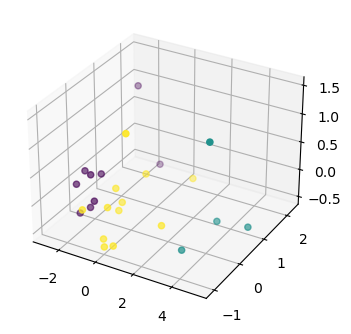

In [25]:
fig=plt.figure(figsize=(4,4))
ax=plt.axes(projection= '3d')
ax.scatter(pc1,pc2,pc3,c=df['labels'])
plt.show()